![](http://www.themainewire.com/wp-content/uploads/2012/07/Screen-Shot-2012-07-25-at-10.01.08-PM.png)

In [150]:
!pip install wordcloud
!pip install folium

In [2]:
import pandas as pd
#please specify the path of csv file while executing the jupyter notebook
df=pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


# Dataset Preparation

### Loading the Libraries

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.validator_cache import ValidatorCache

import folium 
from folium import plugins  

import random

from wordcloud import WordCloud, STOPWORDS

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

### Overview of the Table

In [18]:
print("size of data : ", df.shape[0])

size of data :  239677


In [15]:
df.tail(3)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,loss,year
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,2.0,0::Unknown,0::Unknown,Shot - Wounded/Injured,29.9239,NaN,-90.0442,1.0,NaN,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0,1,2018
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,False,9.0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)",29.7201,Vanderbilt Court apartments,-95.6110,1.0,"Vic was found shot to death in car on 4/1/18, ...",0::42,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim,http://www.khou.com/article/news/hpd-investiga...,149.0,17.0,1,2018
239676,1081940,2018-03-31,Maine,Norridgewock,434 Skowhegan Rd,2,0,http://www.gunviolencearchive.org/incident/108...,https://www.centralmaine.com/2018/03/31/police...,False,2.0,0::Unknown||1::Unknown,0::Handgun||1::Shotgun,"Shot - Dead (murder, accidental, suicide)||Sui...",44.7293,NaN,-69.7691,2.0,"ALT: US 2, shot wife then self, handgun, shotg...",0::58||1::62,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Marie Lancaster Hale||1::William Hale,1::Significant others - current or former,0::Killed||1::Killed,0::Victim||1::Subject-Suspect,https://www.centralmaine.com/2018/03/31/police...,111.0,3.0,2,2018


#### The dataset ranges from 1-Jan-2013 to 31-March-2018

### Statistical Overview 

#### Description of gun data for numerical features

In [14]:
df.describe()#lots of null values everywhere

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district,loss,year
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000,239677.000000,239677.000000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711,0.746296,2015.711629
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456,0.842343,1.225870
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000,0.000000,2013.000000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000,0.000000,2015.000000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000,1.000000,2016.000000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000,1.000000,2017.000000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000,103.000000,2018.000000


we can see from the description that not all the columns have complete data .



#### Description of gun data for categoricals features

In [19]:
df.describe(include=["O"])

,state,city_or_county,address,incident_url,source_url,gun_stolen,gun_type,incident_characteristics,location_description,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources
count,239677,239677,223180,239677,239209,140179,140226,239351,42089,158660,147379,197558,203315,117424,15774,212051,214814,239068
unique,51,12898,198037,239677,213989,349,2502,18126,27595,136652,18951,898,873,113488,284,2150,259,217280
top,Illinois,Chicago,2375 International Pkwy,http://www.gunviolencearchive.org/incident/461105,http://blog.tsa.gov,0::Unknown,0::Unknown,Shot - Wounded/Injured,Austin,man shot,0::24,0::Adult 18+,0::Male,0::Officer,1::Significant others - current or former,0::Injured,0::Victim,http://blog.tsa.gov
freq,17556,10814,160,1,1092,121310,93559,47541,240,501,3814,94671,93496,144,2651,42293,58564,1092


#### Checking for missing Data

Lets find out how many the percentage of null values

In [4]:
per=[]
for i in df.columns:
    num=df[i].isnull().sum()
    final=(num/df.shape[0])*100
    per.append(final)

d={'Col': df.columns,'%null': per}
nulls=pd.DataFrame(data=d)
nulls

,Col,%null
0,incident_id,0.000000
1,date,0.000000
2,state,0.000000
3,city_or_county,0.000000
4,address,6.883013
5,n_killed,0.000000
6,n_injured,0.000000
7,incident_url,0.000000
8,source_url,0.195263
9,incident_url_fields_missing,0.000000


we can see from the results the columns that do not have any null value.

So lets consider values which dont have null to gain insights.


In [6]:
df['loss'] = df['n_killed'] + df['n_injured']
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')
df['date'].head()

0   2013-01-01
1   2013-01-01
2   2013-01-01
3   2013-01-05
4   2013-01-07
Name: date, dtype: datetime64[ns]

In [7]:
df['year']=df['date'].dt.year

In [8]:
state_lst=[df['state'].unique()]
year_lst=[df['date'].dt.year.unique()]

# Data Exploration

## States with most recorded incidences

we will first look in which states we have most amount of Gun violence cases registerd

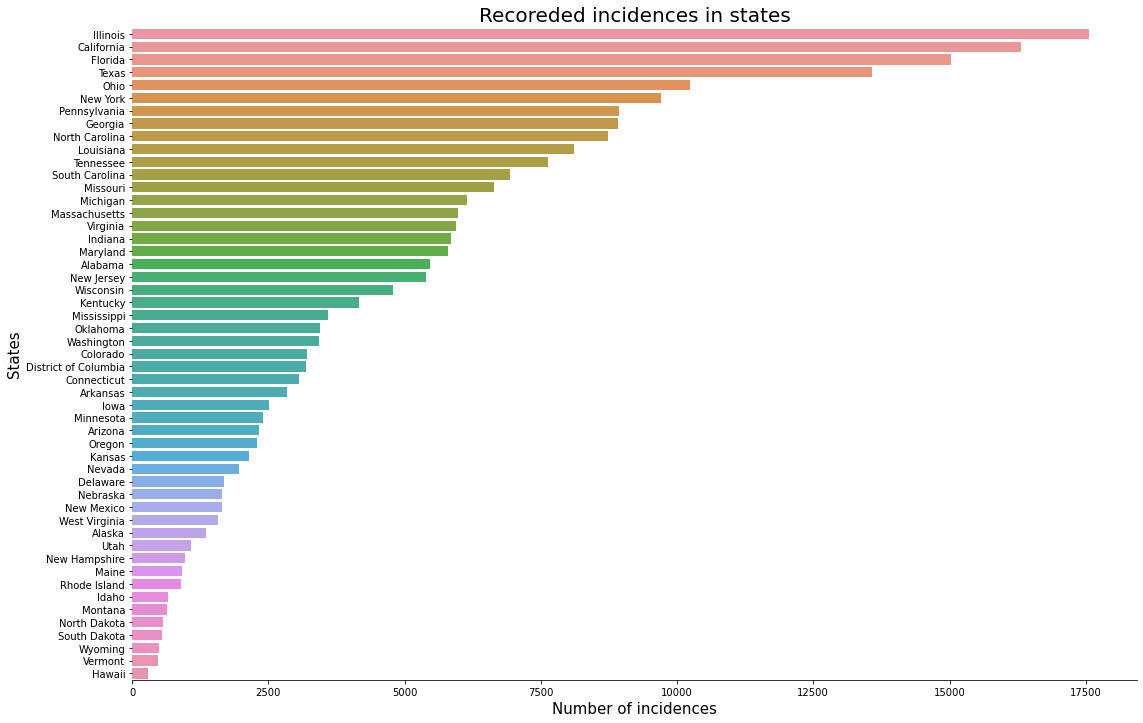

In [22]:
plt.figure(figsize=(18,12))
state=df['state'].value_counts()
sns.barplot(state.values,state.index)
plt.xlabel("Number of incidences",fontsize=15)
plt.ylabel("States",fontsize=15)
plt.title("Recoreded incidences in states",fontsize=20)
sns.despine(left=True,right=True)
plt.show()

Illinois has the highest number of gun violence incidents reported, the number is equal to 17,000. It is followed by California with approx 16000 incidents reported, Florida with 15,000 incidents and Texas with 13,000 gun violence incidents. 

## People killed and injured in states


In [74]:
state_killed=df.groupby(df['state']).sum()
sk_x=state_killed['n_killed'].index.tolist()
sk_y=state_killed['n_killed'].values.tolist()
si=state_killed['n_injured'].values.tolist()

trace1=go.Scatter(
x=sk_x,
y=sk_y,
name='people killed')

trace2=go.Scatter(
x=sk_x,
y=si,
name='people injured',
yaxis='y2')
data=[trace1,trace2]

layout = go.Layout(
    title='Incidences in states',
    xaxis=dict(title='states'),
    yaxis=dict(
        title='People killed',
        titlefont=dict(
            color='rgb(140,38,78)')
    ),
    yaxis2=dict(
        title='people injured',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
 )
                 
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='multiple-axes-double.html')

## Cities with most recorded incidences

Now having a look at cities with most Gun Violence

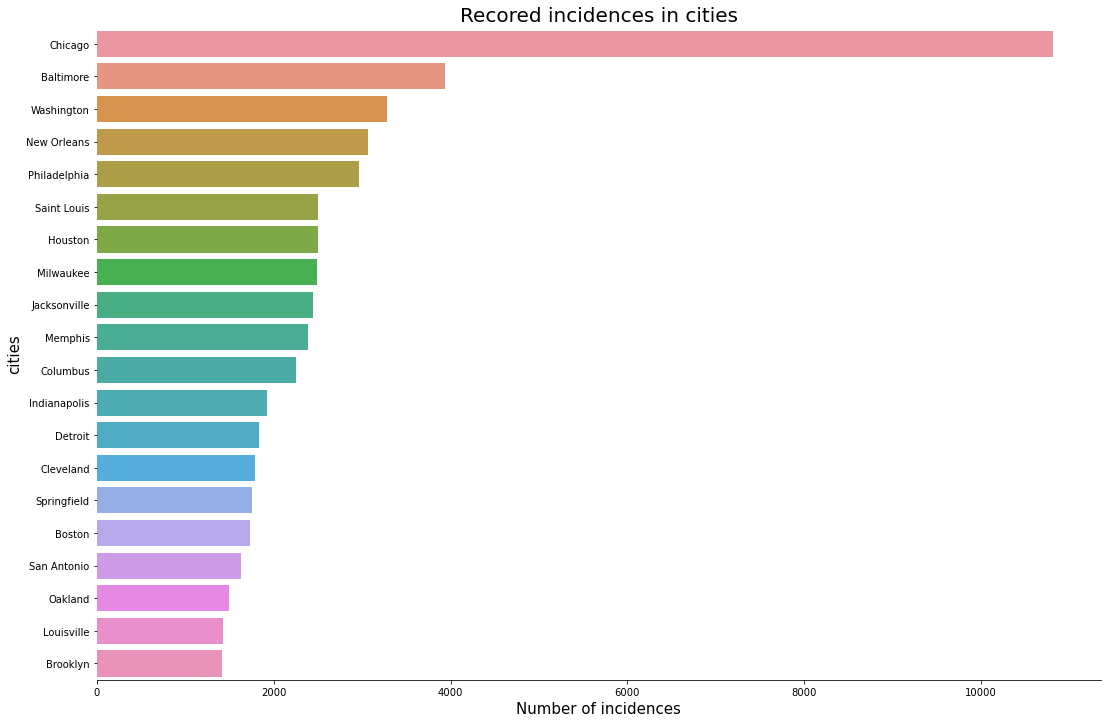

In [31]:
plt.figure(figsize=(18,12))
state=df['city_or_county'].value_counts()[:20]
sns.barplot(state.values,state.index)
plt.xlabel("Number of incidences",fontsize=15)
plt.ylabel("cities",fontsize=15)
plt.title("Recored incidences in cities",fontsize=20)
sns.despine(left=True,right=True)
plt.show()

LOOKS LIKE CHICAGO IS FAR BEYOND OTHERS

## Growth rate of Gun Violence



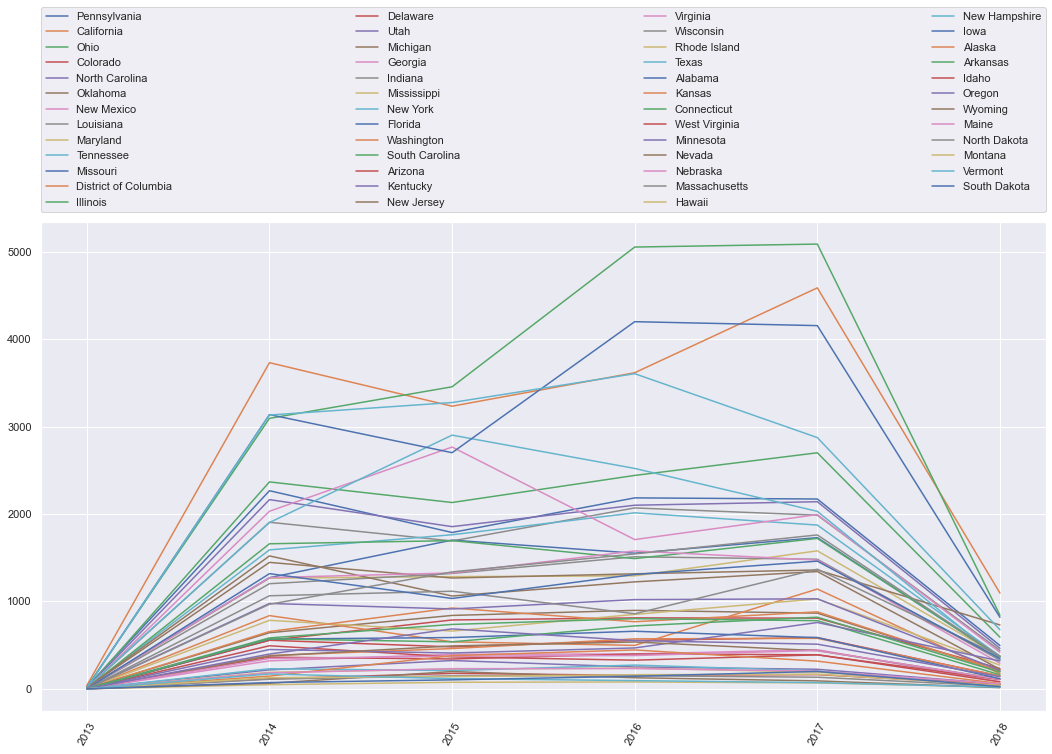

In [151]:
state_lst=[df['state'].unique()]
year_lst=[df['date'].dt.year.unique()]

state_lst_new=[]
for i in range(0,51):
    new=state_lst[0][i]
    state_lst_new.append(new)
    
year_lst_new=[]
for i in range(0,6):
    new=year_lst[0][i]
    year_lst_new.append(new)

plt.figure(figsize=(18,9))
for state in state_lst_new:
    yearly_incd=[]
    for year in year_lst_new:
        my= df.loc[df['state']==state]
        sum=my.loc[my['year']==year]
        sol=sum.shape[0]
        yearly_incd.append(sol)
    plt.plot(yearly_incd,label=state)
plt.xticks(np.arange(6),tuple(year_lst_new),rotation=60)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
plt.show()

The graph clearly shows that some states are definately using GUNS far more than others.

## Total Loss (Injured + Killed) by every state

In [28]:
statdf = df.reset_index().groupby(by=['state']).agg({'loss':'sum', 'year':'count'}).rename(columns={'year':'count'})
statdf['state'] = statdf.index

trace1 = go.Bar(
    x=statdf['state'],
    y=statdf['count'],
    name='Count of Incidents',
    marker=dict(color='firebrick'),
    opacity=0.6
)
trace2 = go.Bar(
    x=statdf['state'],
    y=statdf['loss'],
    name='Total Loss',
    marker=dict(color='yellowgreen'),
    opacity=0.6
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    margin=dict(b=150),
    legend=dict(dict(x=-.1, y=1.2)),
    title = 'State wise number of Gun Violence Incidents and Total Loss',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

## Population Adjusted Dataset
The analysis presented above focused on the absolute numbers of incidents and the top locations, but a population-adjusted dataset is needed for a more thorough analysis. From the webpage below, included several additional population-adjusted characteristics and the population statistics for the top 1000 cities.

http://www.biggestuscities.com/top-1000

http://www.enchantedlearning.com/usa/states/population.shtml

## Incidents Per 100,000 People by State 

Lets explore how many gun violence incidents occured in different states per 100,000 people. Also, lets identify the states with high number of incidents according to the population of the state as well.

In [33]:
states_df = df['state'].value_counts()

statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
statesdf['state_code'] = statesdf['state'].apply(lambda x : state_to_code[x])

In [52]:
census_2013 = {'Mississippi': 2991207, 'Iowa': 3090416, 'Oklahoma': 3850568, 'Delaware': 925749, 'Minnesota': 5420380, 'Alaska': 735132, 'Illinois': 12882135, 'Arkansas': 2959373, 'New Mexico': 2085287, 'Indiana': 6570902, 'Maryland': 5928814, 'Louisiana': 4625470, 'Texas': 26448193, 'Wyoming': 582658, 'Arizona': 6626624, 'Wisconsin': 5742713, 'Michigan': 9895622, 'Kansas': 2893957, 'Utah': 2900872, 'Virginia': 8260405, 'Oregon': 3930065, 'Connecticut': 3596080, 'New York': 19651127, 'California': 38332521, 'Massachusetts': 6692824, 'West Virginia': 1854304, 'South Carolina': 4774839, 'New Hampshire': 1323459, 'Vermont': 626630, 'Georgia': 9992167, 'North Dakota': 723393, 'Pennsylvania': 12773801, 'Florida': 19552860, 'Hawaii': 1404054, 'Kentucky': 4395295, 'Rhode Island': 1051511, 'Nebraska': 1868516, 'Missouri': 6044171, 'Ohio': 11570808, 'Alabama': 4833722, 'South Dakota': 844877, 'Colorado': 5268367, 'Idaho': 1612136, 'New Jersey': 8899339, 'Washington': 6971406, 'North Carolina': 9848060, 'Tennessee': 6495978, 'Montana': 1015165, 'District of Columbia': 646449, 'Nevada': 2790136, 'Maine': 1328302}
statesdf['population'] = statesdf['state'].apply(lambda x : census_2013[x])
statesdf['incidents_per_k'] = statesdf.apply(lambda x : float(x['counts'])*100000 / x['population'], axis=1)
tempdf = statesdf.sort_values('incidents_per_k', ascending = False)[1:50]
trace1 = go.Bar(
    x=tempdf.state,
    y=tempdf.incidents_per_k,
    name='Location Types',
    orientation = 'v',
    marker=dict(color='blue'),
    opacity=0.7
)

data = [trace1]
layout = go.Layout(
    height=400,
    margin=dict(b=150),
    barmode='group',
    legend=dict(dict(x=-.1, y=1.2)),
    title = 'Gun Violence Incidents Per 100,000 people by State',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

Alaska has the highest number of gun violence incidents per 100,000 people approx. equal to 183, while Arizona, Utha, and Idaho are the states with least number of incidents in population adjusted dataset. Interesting to see that California which is one of the top states with high number of gun violence incedents has very low per 100,000 incidents. Illinois still comes in top 5 states with most gun violence incidents.

## Population Adjusted Dataset - Top Cities (Incidents Per 100,000 People)

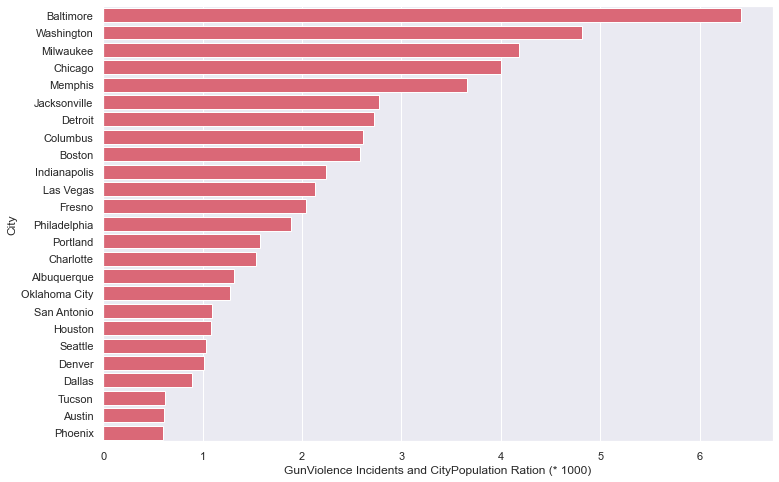

In [55]:
population = {'Carol Stream': '40069', 'La Quinta': '40956', 'Leander': '42761', 'Edinburg': '87650', 'Chino Hills': '78822', 'Pinellas Park': '52137', 'Pacifica': '39062', 'San Luis Obispo': '47536', 'Apache Junction': '39954', 'Toledo': '278508', 'Nampa': '91382', 'Jurupa Valley': '103541', 'Renton': '100953', 'Joplin': '52195', 'Pomona': '152494', 'Hoover': '84978', 'Columbia': '134309', 'Maple Grove': '69576', 'Rowlett': '61999', 'Bayonne': '66238', 'Fremont': '233136', 'Scottsdale': '246645', 'Bozeman': '45250', 'El Paso': '683080', 'Santa Maria': '106290', 'Cedar Park': '68918', 'Shelton': '41334', 'Atlanta': '472522', 'Kettering': '55306', 'Bartlett': '58622', 'Orem': '97499', 'Bullhead City': '39970', 'Bradenton': '55687', 'Waterloo': '67934', 'Scranton': '77291', 'Glendora': '51851', 'Lakeland': '106420', 'West Valley City': '136574', 'Moreno Valley': '205499', 'Brea': '42471', 'Normal': '54264', 'Bolingbrook': '74518', 'Rocky Mount': '55466', 'Redding': '91808', 'Chico': '91567', 'Virginia Beach': '452602', 'Charlotte': '842051', 'Parker': '51163', 'Bloomington': '85319', 'Wake Forest': '40112', 'Beaumont': '118299', 'Huntersville': '54839', 'Oakland Park': '44326', 'Beavercreek': '46376', 'Broken Arrow': '107403', 'Seattle': '704352', 'Santa Barbara': '91930', 'Sandy': '95836', 'El Monte': '115807', 'Grand Island': '51517', 'Santa Monica': '92478', 'Ocala': '59253', 'Oro Valley': '43781', 'Waco': '134432', 'Midwest City': '57305', 'Allentown': '120443', 'Garden Grove': '174858', 'Bellflower': '77790', 'Denver': '693060', 'Minot': '48743', 'Des Plaines': '58141', 'Burlington': '52709', 'Orange': '140504', 'Dunwoody': '48884', 'San Mateo': '103959', 'Minnetonka': '52369', 'Eagan': '66428', 'Oceanside': '175464', 'Avondale': '82881', 'Alameda': '78906', 'San Diego': '1406630', 'Haverhill': '62873', 'Waukegan': '88182', 'Daytona Beach': '66645', 'Grove City': '39721', 'Altoona': '44589', 'Hamilton': '62127', 'Kirkland': '87701', 'Honolulu': '351792', 'Macon-Bibb County': '152555', 'Stillwater': '49504', 'Colorado Springs': '465101', 'Cedar Hill': '48343', 'Jupiter': '63813', 'Overland Park': '188966', 'Boise City': '223154', 'Missoula': '72364', 'Burbank': '104447', 'Youngstown': '64312', 'Sunnyvale': '152771', 'Hoboken': '54379', 'Ankeny': '58627', 'Harrisonburg': '53078', 'Rancho Santa Margarita': '48969', 'Fitchburg': '40414', 'Revere': '53157', 'Fountain Valley': '56529', 'San Bruno': '42957', 'Pembroke Pines': '168587', 'Friendswood': '39396', 'Bountiful': '44078', 'Terre Haute': '60852', 'Methuen': '49917', 'Las Vegas': '632912', 'South San Francisco': '66980', 'Cedar Falls': '41390', 'Carlsbad': '113952', 'Quincy': '93688', 'Waterbury': '108272', 'Thornton': '136703', 'Mount Pleasant': '84170', 'Livermore': '89115', 'Lansing': '116020', 'Richmond': '223170', 'Providence': '179219', 'Clearwater': '114361', 'Pasadena': '153351', 'Clovis': '106583', 'Augusta-Richmond County': '197081', 'Lacey': '47688', 'East Providence': '47337', 'Columbus': '860090', 'Indianapolis': '855164', 'Danbury': '84992', 'Sarasota': '56610', 'Mountain View': '80447', 'South Bend': '101735', 'Watsonville': '53796', 'Ann Arbor': '120782', 'Valdosta': '56474', 'Berwyn': '55748', 'Akron': '197633', 'Memphis': '652717', 'Enid': '51004', 'Brighton': '38314', 'Lake Charles': '76848', 'West Lafayette': '45872', 'Littleton': '46333', 'Orlando': '277173', 'Loveland': '76897', 'Spanish Fork': '38861', 'Edmonds': '41840', 'Goose Creek': '42039', 'Monterey Park': '61075', 'Woburn': '39452', 'Upland': '76684', 'Edina': '51350', 'Bowling Green': '65234', 'Oxnard': '207906', 'San Rafael': '58954', 'Costa Mesa': '112822', 'Roseville': '132671', 'Birmingham': '212157', 'Bothell': '44546', 'Buckeye': '64629', 'Oklahoma City': '638367', 'Broomfield': '66529', 'Hattiesburg': '46926', 'West Des Moines': '64560', 'Denton': '133808', 'Weslaco': '40033', 'Flagstaff': '71459', 'Annapolis': '39418', 'Yucaipa': '53309', 'West Palm Beach': '108161', 'West Jordan': '113699', 'Bonita Springs': '54198', 'Plainfield': '50636', 'Buffalo Grove': '41346', 'Utica': '60652', 'Paterson': '147000', 'Fond du Lac': '42951', 'Harlingen': '65539', 'Ocoee': '44820', 'Moline': '42250', 'Paramount': '54909', 'Winter Garden': '41988', 'Phoenix': '1615017', 'State College': '41992', 'Irving': '238289', 'Edmond': '91191', 'Manhattan': '54983', 'Pocatello': '54746', 'Hartford': '123243', 'Missouri City': '74561', 'Summerville': '49323', 'Joliet': '148262', 'Azusa': '49628', 'Alpharetta': '65338', 'Boynton Beach': '75569', 'North Las Vegas': '238702', 'Sioux Falls': '174360', 'Chattanooga': '177571', 'Port Orange': '61105', 'Federal Way': '96757', 'Lexington-Fayette': '318449', 'Riverton': '42838', 'Chesapeake': '237940', 'Compton': '97550', 'Smyrna': '56664', 'Rock Island': '38210', 'Duluth': '86293', 'Petaluma': '60530', 'Doral': '57947', 'Wheaton': '53389', 'Oak Park': '51774', 'Wheeling': '38315', 'St. Louis': '311404', 'Ceres': '48278', 'Tallahassee': '190894', 'Lakewood': '154393', 'Mount Prospect': '54171', 'Nashua': '87882', 'Rocklin': '62787', 'Woonsocket': '41406', 'Salinas': '157218', 'Janesville': '64159', 'New Rochelle': '79557', 'Euclid': '47360', 'Turlock': '72796', 'Schenectady': '64913', 'McKinney': '172298', 'Yorba Linda': '68235', 'Redondo Beach': '67867', 'Bowie': '58393', 'Grapevine': '51971', 'Arlington': '392772', 'Perth Amboy': '52499', 'Wyoming': '75567', 'Montgomery': '200022', 'Newark': '281764', 'Apple Valley': '72553', 'Wilson': '49620', 'Sandy Springs': '105703', 'Charlottesville': '46912', 'Warwick': '81579', 'Pico Rivera': '63635', 'Irvine': '266122', 'Waltham': '63002', 'Chesterfield': '47659', 'Palm Beach Gardens': '53778', 'Lodi': '64641', 'Stanton': '38644', 'Thousand Oaks': '128888', 'Harrisburg': '48904', 'Elyria': '53715', 'Marlborough': '39697', 'Menifee': '88531', 'Fort Wayne': '264488', 'Conroe': '82286', 'Medford': '81636', 'Rochester Hills': '73422', 'Jonesboro': '74889', 'Carrollton': '133351', 'Lenexa': '52903', 'West New York': '53343', 'Vallejo': '121299', 'Cutler Bay': '44707', 'Norfolk': '245115', 'Rogers': '65021', 'Colton': '54712', 'Miami': '453579', 'Lorain': '63730', 'Kyle': '39060', 'Cerritos': '50555', 'Topeka': '126808', 'Kenosha': '99631', 'New Britain': '72558', 'Brookhaven': '52444', 'Glenview': '47475', 'Montclair': '38944', 'Tigard': '51902', 'Indio': '88488', 'East Lansing': '48870', 'North Port': '64274', 'Pittsburg': '70679', 'Savannah': '146763', 'Newton': '89045', 'Pharr': '77320', 'Fort Worth': '854113', 'McAllen': '142212', 'Palm Coast': '85109', 'North Little Rock': '66278', 'Gary': '76424', 'Orland Park': '58862', 'Gilroy': '55069', 'Coppell': '41360', 'Maricopa': '46903', 'Pearland': '113570', 'Sparks': '98345', 'Evanston': '74895', 'San Clemente': '65309', 'Hesperia': '93724', 'Port St. Lucie': '185132', 'Reading': '87575', 'Rosemead': '54500', 'Gilbert': '237133', 'Laredo': '257156', 'Folsom': '77271', 'Bossier City': '68485', 'Elizabeth': '128640', 'Westland': '81545', 'Everett': '109043', 'Hawthorne': '88031', 'Dubuque': '58531', 'Hilton Head Island': '40500', 'Palm Bay': '110104', 'Newport News': '181825', 'Hanford': '55547', 'Manchester': '110506', 'Chino': '87776', 'Euless': '54769', 'Cranston': '81034', 'Miami Beach': '91917', 'St. Charles': '69293', 'Florissant': '51776', 'Diamond Bar': '56793', 'Iowa City': '74398', 'Kentwood': '51689', 'Barnstable Town': '44254', 'Frisco': '163656', 'Tucson': '530706', 'Apopka': '49458', 'Urbandale': '43018', 'St. Louis Park': '48747', 'Westfield': '41552', 'Redwood City': '84950', 'Buffalo': '256902', 'Cambridge': '110651', 'Lake Oswego': '38945', 'Boston': '673184', 'Kennewick': '80454', 'Dayton': '140489', 'Delray Beach': '67371', 'Layton': '75655', 'Owensboro': '59273', 'Sunrise': '93734', 'Arlington Heights': '75525', 'Huntington': '48113', 'Erie': '98593', 'Longview': '82055', 'Norwalk': '106178', 'Sanford': '58605', 'Ontario': '173212', 'Eastvale': '61151', 'Georgetown': '67140', 'Noblesville': '60183', 'Jackson': '169148', 'Hollywood': '151998', 'New Braunfels': '73959', 'Miramar': '138449', 'West Haven': '54516', 'Prescott Valley': '43132', 'Novi': '59211', 'Rancho Palos Verdes': '42435', 'Placentia': '52228', 'Miami Gardens': '113058', 'Alhambra': '85474', 'Jeffersonville': '47124', 'Blue Springs': '54431', 'Shreveport': '194920', 'Escondido': '151613', 'Mesa': '484587', 'Cathedral City': '54056', 'Sioux City': '82872', 'Lincoln': '280364', 'Great Falls': '59178', 'Vineland': '60525', 'Rockville': '66940', 'Hagerstown': '40452', 'La Crosse': '52109', 'Fort Smith': '88133', 'Tinley Park': '56831', 'Malden': '60840', 'Beverly': '41365', 'Lawton': '94653', 'Flower Mound': '73547', 'Kalamazoo': '75984', 'Wichita Falls': '104724', 'Concord': '128726', 'Morgan Hill': '44155', 'Anderson': '55130', 'Schertz': '39453', 'Auburn': '77472', 'New York': '8537673', 'Hendersonville': '57050', 'Hurst': '39160', 'Casper': '59324', 'Ormond Beach': '42162', 'Buena Park': '83156', 'Haltom City': '44361', 'Rockwall': '43586', 'Abilene': '122225', 'Crystal Lake': '40339', 'Lubbock': '252506', 'Sumter': '40723', 'Philadelphia': '1567872', 'Westminster': '113875', 'Downey': '113267', 'Parma': '79425', 'Danville': '44631', 'DeKalb': '43194', 'Fort Myers': '77146', 'North Lauderdale': '43699', 'Torrance': '147195', 'Odessa': '117871', 'Sayreville': '44905', 'Shoreline': '55333', 'Muskogee': '38352', 'Mankato': '41720', 'Linden': '42457', 'Logan': '50676', 'Grand Junction': '61881', 'Grand Rapids': '196445', 'Carpentersville': '38291', 'Antioch': '110898', 'Sheboygan': '48686', 'Appleton': '74370', 'Dothan': '68468', 'Decatur': '72706', 'Pueblo': '110291', 'Greenacres': '40013', 'Hallandale Beach': '39500', 'Elk Grove': '169743', 'Cape Girardeau': '39628', 'Ogden': '86701', 'Frederick': '70060', 'Lafayette': '127626', 'Manassas': '41483', 'Prescott': '42513', 'Kannapolis': '47839', 'San Bernardino': '216239', 'Pleasant Grove': '38756', 'Romeoville': '39706', 'El Centro': '44201', 'Galveston': '50550', 'Trenton': '84056', 'Fall River': '88930', 'Chapel Hill': '59246', 'Coral Gables': '50815', 'Union City': '75322', 'Coon Rapids': '62359', 'Suffolk': '89273', 'Lauderhill': '71626', 'Encinitas': '63131', 'Bend': '91122', 'La Puente': '40377', 'Corpus Christi': '325733', 'Marion': '38480', 'Duncanville': '39457', 'Hickory': '40567', 'Sierra Vista': '43208', 'Hammond': '77134', 'Shawnee': '65194', 'South Gate': '95538', 'Burnsville': '61290', 'Ames': '66191', 'Davis': '68111', 'Clarksville': '150287', 'Kent': '127514', 'Charleston': '134385', 'Collierville': '49177', 'Lynchburg': '80212', 'Independence': '117030', 'Henderson': '292969', 'Redmond': '62458', 'Tulsa': '403090', 'Laguna Niguel': '65328', 'Sacramento': '495234', 'Johns Creek': '83873', 'Lewisville': '104659', 'York': '43859', 'Fishers': '90127', 'DeSoto': '52599', 'Biloxi': '45975', 'Whittier': '86883', 'Camarillo': '67363', 'Redlands': '71288', 'The Colony': '42408', 'Saginaw': '48984', 'Altamonte Springs': '43492', 'Dublin': '59583', 'Jefferson City': '43013', 'Cedar Rapids': '131127', 'Mentor': '46732', 'Sherman': '41567', 'Rio Rancho': '96028', 'Largo': '83065', 'St. Cloud': '67641', 'Niagara Falls': '48632', 'Santa Clarita': '181972', 'Olympia': '51202', 'Warner Robins': '74388', 'Moore': '61415', 'Sammamish': '63773', 'Washington': '681170', 'Covington': '40797', 'Minneapolis': '413651', 'Cuyahoga Falls': '49206', 'Visalia': '131074', 'Livonia': '94041', 'Salt Lake City': '193744', 'Casa Grande': '54534', 'Allen': '99179', 'Chula Vista': '267172', 'Pawtucket': '71427', 'White Plains': '58241', 'Camden': '74420', 'Manteca': '76908', 'Gulfport': '72076', 'Rochester': '208880', 'Fontana': '209665', 'Knoxville': '186239', 'San Leandro': '90465', 'Arvada': '117453', 'Rapid City': '74048', 'Kokomo': '57799', 'Bremerton': '40675', 'Cheyenne': '64019', 'Grand Forks': '57339', 'Surprise': '132677', 'Downers Grove': '49473', 'San Buenaventura (Ventura)': '109592', 'Evansville': '119477', 'St. Peters': '57289', 'Cicero': '82992', 'Coral Springs': '130059', 'Poway': '50077', 'Southaven': '53214', 'Taylorsville': '60436', 'Pontiac': '59698', 'Hempstead': '55555', 'Wausau': '38872', 'Aurora': '361710', 'Lehi': '61130', 'New Orleans': '391495', 'Elmhurst': '46387', 'Los Angeles': '3976322', 'Strongsville': '44631', 'San Antonio': '1492510', 'Rockford': '147651', 'Marana': '43474', 'Kenner': '67089', 'North Charleston': '109298', 'Bell Gardens': '42806', 'Bridgeport': '145936', 'Hoffman Estates': '51738', 'Blacksburg': '45038', 'Milford': '52536', 'Tustin': '80395', 'Round Rock': '120892', 'Streamwood': '40166', 'College Station': '112141', 'Sugar Land': '88177', 'Pompano Beach': '109393', 'Maplewood': '40150', 'Cupertino': '60643', 'Portsmouth': '95252', 'Daly City': '106472', 'Battle Creek': '51534', 'Santa Fe': '83875', 'Holyoke': '40280', 'Modesto': '212175', 'Mesquite': '143736', 'La Mirada': '49216', 'Eden Prairie': '63914', 'Tacoma': '211277', 'Cypress': '48906', 'Weymouth Town': '55972', 'Palm Springs': '47689', 'Santa Clara': '125948', 'Kearny': '42126', 'Delaware': '38643', 'Fullerton': '140721', 'San Gabriel': '40404', 'Schaumburg': '74446', 'Santa Ana': '334217', 'Riverside': '324722', 'Lompoc': '43712', 'Temple': '73600', 'Peachtree Corners': '42773', 'Cary': '162320', 'Victorville': '122265', 'Johnson City': '66677', 'Chicago': '2704958', 'Cape Coral': '179804', 'Farmington': '41629', 'Apex': '47349', 'El Cajon': '103768', 'Marietta': '60941', 'Mansfield': '65631', 'Perris': '76331', 'Twin Falls': '48260', 'League City': '102010', 'Germantown': '39056', 'Rohnert Park': '42622', 'New Bedford': '95032', 'Port Arthur': '55427', 'Leominster': '41663', 'Puyallup': '40640', 'Wellington': '63900', 'West Allis': '60087', 'Anaheim': '351043', 'Richardson': '113347', 'Fayetteville': '204759', 'Davenport': '102612', 'New Brunswick': '56910', 'Sterling Heights': '132427', 'Elgin': '112123', "Lee's Summit": '96076', 'Conway': '65300', 'Deltona': '90124', 'North Miami Beach': '43891', 'Merced': '82594', 'Worcester': '184508', 'Delano': '52707', 'Martinez': '38259', 'Salem': '167419', 'Bethlehem': '75293', 'St. George': '82318', 'Cleveland': '385809', 'Campbell': '40939', 'Lynwood': '71187', 'Leesburg': '52607', 'Somerville': '81322', 'City': '2016 Population', 'Temecula': '113054', 'Inglewood': '110654', 'Bismarck': '72417', 'Murrieta': '111674', 'Pensacola': '53779', 'Hackensack': '44756', 'Plantation': '92706', 'St. Clair Shores': '59775', 'Coachella': '44953', 'Chandler': '247477', 'Lowell': '110558', 'Oak Lawn': '56257', 'Mishawaka': '48679', 'Norwich': '39556', 'Huntsville': '193079', 'Lake Havasu City': '53743', 'Amarillo': '199582', 'Hemet': '84281', 'Mobile': '192904', 'Fort Pierce': '45295', 'Rancho Cordova': '72326', 'San Ramon': '75639', 'Oshkosh': '66579', 'Muskegon': '38349', 'Plano': '286057', 'Beaverton': '97590', 'Waukesha': '72363', 'San Angelo': '100702', 'Centennial': '109932', 'Bakersfield': '376380', 'Gastonia': '75536', 'Chelsea': '39699', 'Anchorage': '298192', 'Athens-Clarke County': '123371', 'Freeport': '43279', 'Kansas City': '481420', 'Skokie': '64270', 'Deerfield Beach': '79764', 'Culver City': '39364', 'Raleigh': '458880', 'Bristol': '60147', 'Glendale': '245895', 'Monroe': '49297', 'Rialto': '103314', 'Carmel': '91065', 'Houston': '2303482', 'Hampton': '135410', 'Garland': '234943', 'Cleveland Heights': '44633', 'Gresham': '111523', 'Reno': '245255', 'Council Bluffs': '62524', 'Citrus Heights': '87432', 'Des Moines': '215472', 'Milwaukee': '595047', 'Portland': '639863', 'Elkhart': '52221', 'St. Paul': '302398', 'Roanoke': '99660', 'Albany': '98111', 'Middletown': '48813', 'Richland': '54989', 'Woodland': '59068', 'Provo': '116868', 'Titusville': '46019', 'Tamarac': '65199', 'Tyler': '104798', 'Indian Trail': '38222', 'Santa Rosa': '175155', 'San Francisco': '870887', 'Plant City': '38200', 'Yuma': '94906', 'Spokane Valley': '96340', 'Bellevue': '141400', 'Champaign': '86637', 'Shakopee': '40610', 'Grand Prairie': '190682', 'Victoria': '67670', 'Flint': '97386', 'Marysville': '67626', 'Berkeley': '121240', 'Oakley': '40622', 'Dearborn': '94444', 'Palmdale': '157356', 'Chicopee': '55991', 'Tampa': '377165', 'Greenwood': '56545', 'Palm Desert': '52231', 'East Orange': '64789', 'Pine Bluff': '43841', 'Corona': '166785', 'Winston-Salem': '242203', 'Bellingham': '87574', 'Burleson': '45016', 'Castle Rock': '57666', 'Attleboro': '44434', 'Canton': '71323', 'Walnut Creek': '69122', 'Alexandria': '155810', 'Cincinnati': '298800', 'Fresno': '522053', 'West Covina': '107847', 'Kingsport': '52806', 'Hialeah': '236387', 'Long Beach': '470130', 'Troy': '83641', 'Durham': '263016', 'Wilkes-Barre': '40569', 'San Jacinto': '47413', 'San Marcos': '95261', 'Naperville': '147122', 'Warren': '135125', 'Rock Hill': '72937', 'Milpitas': '77528', 'Santee': '57834', 'Lynn': '92697', 'Caldwell': '53149', 'Gainesville': '131591', 'Palatine': '68766', 'Napa': '80416', 'Baytown': '75992', 'Louisville/Jefferson County': '616261', 'Baldwin Park': '76464', 'National City': '61147', 'Muncie': '69010', 'Goodyear': '77258', 'Meridian': '95623', 'Eugene': '166575', 'Murfreesboro': '131947', 'Jersey City': '264152', 'Draper': '47328', 'Passaic': '70635', 'Pittsburgh': '303625', 'Yakima': '93986', 'Albuquerque': '559277', 'Nashville-Davidson': '660388', 'North Richland Hills': '69798', 'Brockton': '95630', 'Syracuse': '143378', 'Arcadia': '58523', 'Spokane': '215973', 'Killeen': '143400', 'Wichita': '389902', 'San Jose': '1025350', 'Davie': '101871', 'High Point': '111223', 'Las Cruces': '101759', 'Longmont': '92858', 'Margate': '57870', 'Brownsville': '183823', 'Oviedo': '39337', 'Madison': '252551', 'Taylor': '61177', 'Fort Collins': '164207', 'Westerville': '38985', 'Atlantic City': '38735', 'Peabody': '52491', 'Commerce City': '54869', 'Tuscaloosa': '99543', 'Roy': '38201', 'Blaine': '62892', 'La Habra': '61664', 'Huntington Beach': '200652', 'Keizer': '38980', 'Brooklyn Park': '79707', 'Rancho Cucamonga': '176534', 'Pasco': '70579', 'Salina': '47336', 'Midland': '134610', 'Dallas': '1317929', 'Urbana': '42014', 'Novato': '56004', 'Winter Haven': '38953', 'Greenville': '91495', 'St. Petersburg': '260999', 'Fairfield': '114756', 'Portage': '48508', 'Meriden': '59622', 'Tulare': '62779', 'Corvallis': '57110', 'Racine': '77571', 'Boulder': '108090', 'Fort Lauderdale': '178752', 'Findlay': '41422', 'Norman': '122180', 'Lawrence': '95358', 'Aliso Viejo': '51424', 'Baton Rouge': '227715', 'Asheville': '89121', 'Santa Cruz': '64465', 'Newport Beach': '86688', 'Binghamton': '45672', 'Billings': '110323', 'Olathe': '135473', 'Kissimmee': '69369', 'Vacaville': '98303', 'Calexico': '40232', 'Homestead': '67996', 'Green Bay': '105139', 'Bryan': '83260', 'Boca Raton': '96114', 'Bedford': '49528', "Coeur d'Alene": '50285', 'Hutchinson': '41310', 'Little Rock': '198541', 'Detroit': '672795', 'Lake Forest': '83240', 'Belleville': '41906', 'Franklin': '74794', 'Porterville': '58978', 'New Berlin': '39803', 'Highland': '54939', 'Austin': '947890', 'Greensboro': '287027', 'Southfield': '73100', 'Lake Elsinore': '64205', 'Stockton': '307072', 'Mission Viejo': '96396', 'Mount Vernon': '68344', 'Greeley': '103990', 'Madera': '64444', 'Murray': '49230', 'Pleasanton': '82270', 'Lombard': '43815', 'Lakeville': '61938', 'North Miami': '62139', 'Gaithersburg': '67776', 'Florence': '39959', 'Bentonville': '47093', 'Lancaster': '160106', 'Vista': '101659', 'Wylie': '47701', 'Yonkers': '200807', 'Springdale': '78557', 'Huntington Park': '58879', 'Dearborn Heights': '55761', 'Texas City': '48262', 'Pflugerville': '59245', 'Carson': '92797', 'Fargo': '120762', 'Idaho Falls': '60211', 'Vancouver': '174826', 'Little Elm': '42504', 'Hillsboro': '105164', 'Springfield': '167319', 'Coconut Creek': '59405', 'Weston': '70015', 'Wauwatosa': '47945', 'Tempe': '182498', 'Woodbury': '68820', 'Simi Valley': '126327', 'St. Joseph': '76472', 'Farmington Hills': '81129', 'South Jordan': '69034', 'Tracy': '89274', 'Hayward': '158937', 'Jacksonville': '880619', 'Milton': '38411', 'Carson City': '54742', 'Omaha': '446970', 'Northglenn': '38982', 'Yuba City': '66845', 'Wilmington': '117525', 'Gardena': '60048', 'Melbourne': '81185', 'Plymouth': '77216', 'Palo Alto': '67024', "O'Fallon": '86274', 'Eau Claire': '68339', 'Baltimore': '614664', 'Brentwood': '60532', 'New Haven': '129934', 'Covina': '48549', 'Pittsfield': '42846', 'Roswell': '94598', 'Taunton': '56843', 'Tupelo': '38842', 'Clifton': '85845', 'Mission': '83563', 'Montebello': '63335', 'West Sacramento': '52981', 'La Mesa': '59948', 'Royal Oak': '59006', 'Stamford': '129113', 'Keller': '46646', 'Moorhead': '42492', 'Oakland': '420005', 'Peoria': '164173', 'Burien': '50997'}
df['city_population'] = df['city_or_county'].apply(lambda x : int(population[x]) if x in population else 0)

tempdf = df.groupby(by=['city_or_county']).agg({'n_killed': 'sum', 'n_injured' : 'sum', 'city_population' : 'mean', 'state' : 'count'}).reset_index().rename(columns={'state' : 'total_incidents', 'n_killed' : 'total_killed', 'n_injured' : 'total_injured'})
tempdf['incidents_population_ratio'] = 1000*tempdf['total_incidents'] / (tempdf['city_population']+1) 
tempdf['killed_population_ratio'] = 1000*tempdf['total_killed'] / (tempdf['city_population']+1) 
tempdf['injured_population_ratio'] = 1000*tempdf['total_injured'] / (tempdf['city_population']+1) 
tempdf['loss_population_ratio'] = 1000*(tempdf['total_killed'] + tempdf['total_injured']) / (tempdf['city_population']+1) 

i_p = tempdf.sort_values(['incidents_population_ratio'], ascending=[False])
i_p = i_p[i_p['city_population'] > 500000][:25]
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(y='city_or_county', x='incidents_population_ratio', data=i_p, color='#ed5569')
ax.set(xlabel='GunViolence Incidents and CityPopulation Ration (* 1000)', ylabel='City');

Baltimore (City in Maryland) has the highest ratio of GunViolence Incidents and City Population, In contrast to Chicago where absolute number of gun violence incidents was highest. Baltimore had 3943 total gun violence incidents and its population in 2017 was 614,664. Chicago had more than 10,000 gun violence incidents in recent years, but it is one of the most populated city of US (2017 population = 2704958) and its ratio of gunviolence incidents and population comes at number four after Baltimore, Washingon, and Milwaukee.

## Population Adjusted Dataset - Top Cities (People Killed Per 100,000 People)

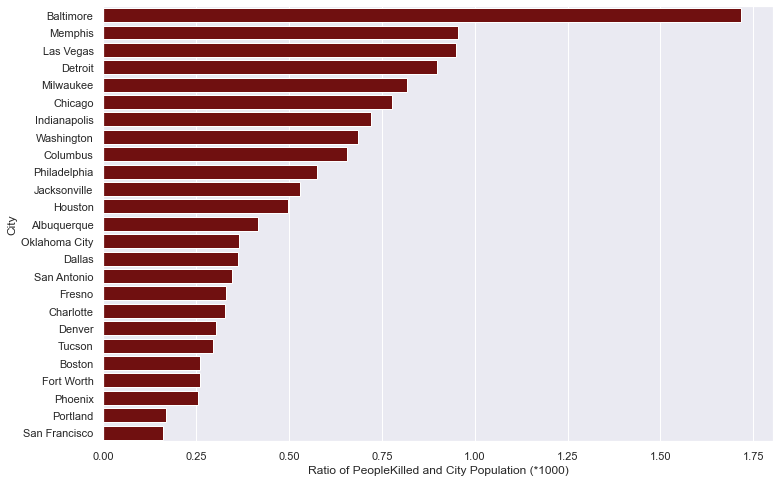

In [56]:
#tempdf['killed_population_ratio'] = 1000*tempdf['total_killed'] / (tempdf['city_population']+1) 
i_p = tempdf.sort_values(['killed_population_ratio'], ascending=[False])
i_p = i_p[i_p['city_population'] > 500000][:25]
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(y='city_or_county', x='killed_population_ratio', data=i_p, color='maroon')
ax.set(xlabel='Ratio of PeopleKilled and City Population (*1000)', ylabel='City');

Baltimore again tops the list as there are about 1000 people which were killed in gun violence incidents and this ratio is equal to 1.716382. Las Vegas with 632912 and Memphis with the population size of 652717 comes at 2nd and 3rd place as 660 and 623 people were killed. Their respecitve killed to population ratio is 1.04 and 0.95. Chicago, where maximum incidents has occured has the killed to population ratio of 0.77 which comes at 6th spot

## Population Adjusted Dataset - Top Cities (People Injured Per 100,000 People)

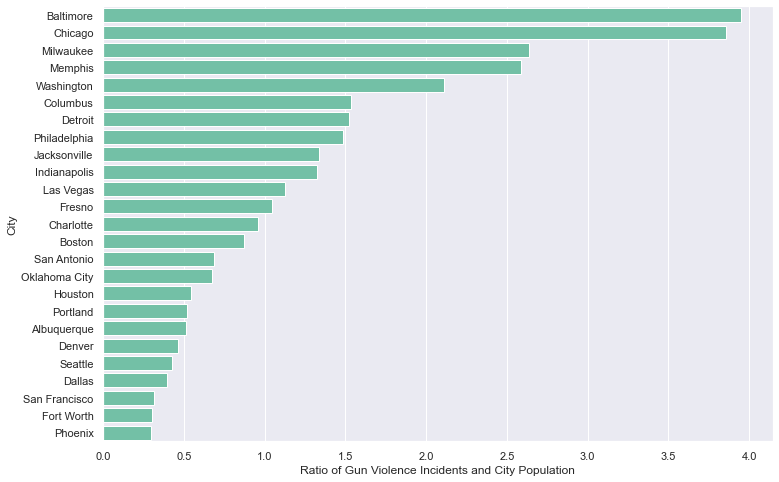

In [59]:
i_p = tempdf.sort_values(['injured_population_ratio'], ascending=[False])
i_p = i_p[i_p['city_population'] > 500000][:25]
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(y='city_or_county', x='injured_population_ratio', data=i_p, color='mediumaquamarine')
ax.set(xlabel='Ratio of Gun Violence Incidents and City Population', ylabel='City');

Baltmore and Chicago are the cities with highest ratio of people injured in gun violence incidents and city population. Apart from these, Milwaukee, Memphis, and Washington are other top cities where the ratio of people getting injured in gun violence incidents is quite higher .

## Common Areas of Gun Violence Incidents 

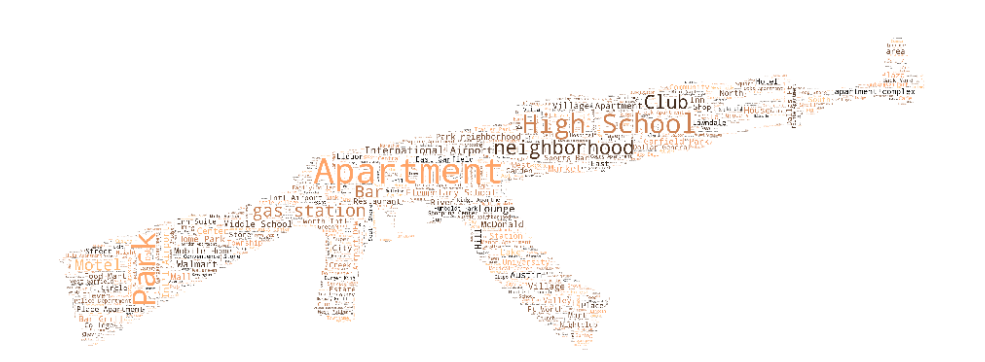

The above word colud depicts that most number of gun violence incidents are reported in High School, Apartment, Parks, Gas Station, Walmart, Motel, Bar, Club etc.

## Gun use in congressional district

In U.S.A. each states are divided into many congressional districts and it ranges from as few as 2 - (40s)

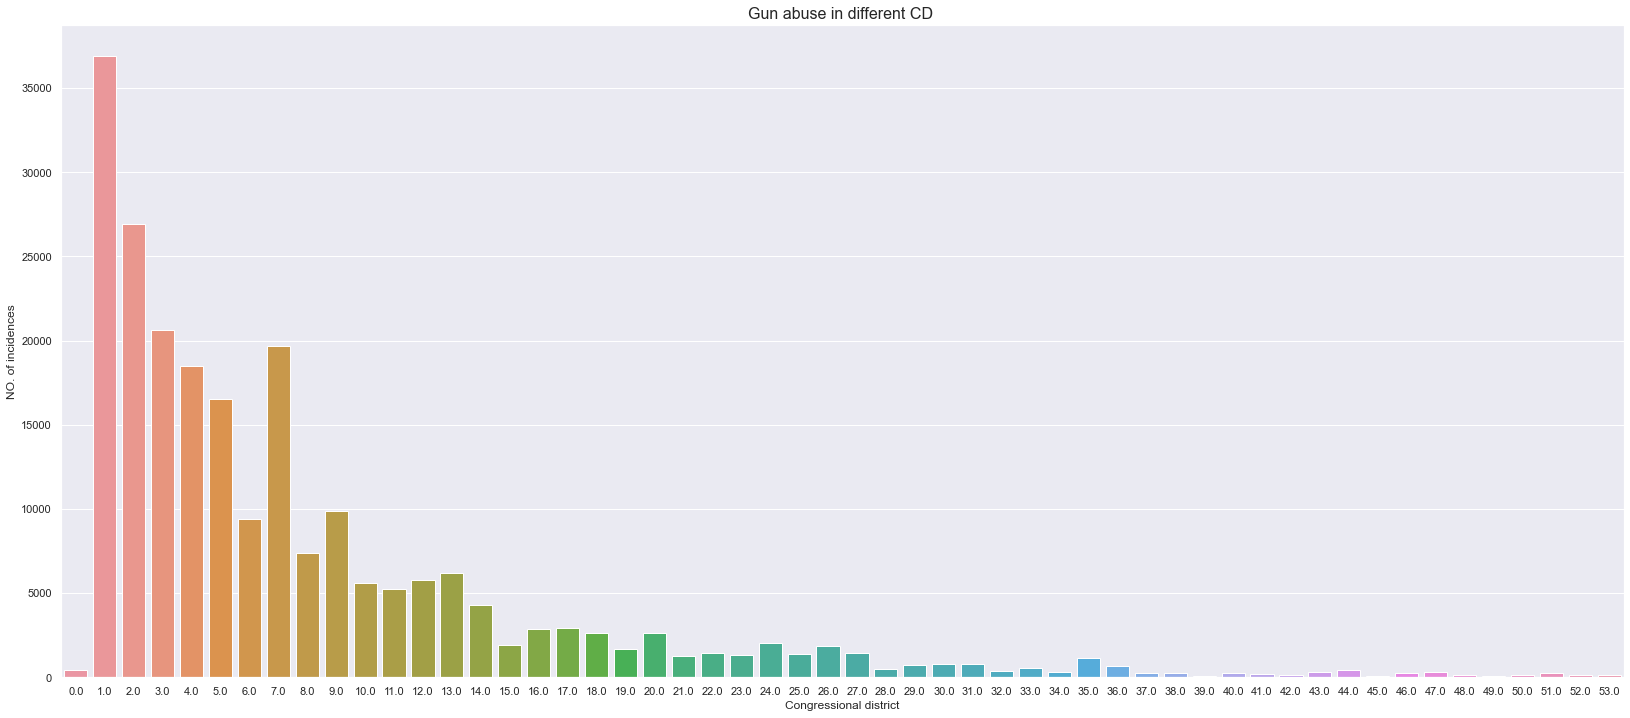

In [82]:
cd=df[np.isfinite(df['congressional_district'])]
my_cd=cd['congressional_district'].value_counts()

plt.figure(figsize=(28,12))
sns.barplot(my_cd.index,my_cd.values)
plt.xlabel("Congressional district",fontsize=12)
plt.ylabel("NO. of incidences",fontsize=12)
plt.title("Gun abuse in different CD ",fontsize=16)
plt.show()

#### we are not trying to connect gun violence issues in the US to politics

## Types of Guns used

In [16]:
type=df.dropna(how='any',axis=0)
my_type=type['gun_type'].values.tolist()
del( my_type[5:11])

my_set=set()
for guns in my_type:
    if len(guns)<=18:
        adds=guns.split("::")[1]
        my_set.add(adds)
    else:
        my_item=[]
        my_items=[]
        lst1=guns.split("||")
        for item in lst1:
            my=item.split("::")
            my_item.append(my)
        for items in my_item:
            adds=items[1]
            my_items.append(adds)
        for adding in my_items:
            my_set.add(adding)
        
        
remove=['45 Auto||1','9mm||1','Handgun||1','Rifle||1']
for rem in remove:
    my_set.remove(rem)
my_set

str_set=[]
for e in my_set:
    string=str(e)
    str_set.append(string)
str_set

['223 Rem [AR-15]',
 '410 gauge',
 '25 Auto',
 '9mm',
 '380 Auto',
 '32 Auto',
 '12 gauge',
 '44 Mag',
 '7.62 [AK-47]',
 '357 Mag',
 '22 LR',
 'Shotgun',
 '30-30 Win',
 '38 Spl',
 '45 Auto',
 '40 SW',
 'Other',
 'Unknown',
 'Handgun',
 'Rifle']

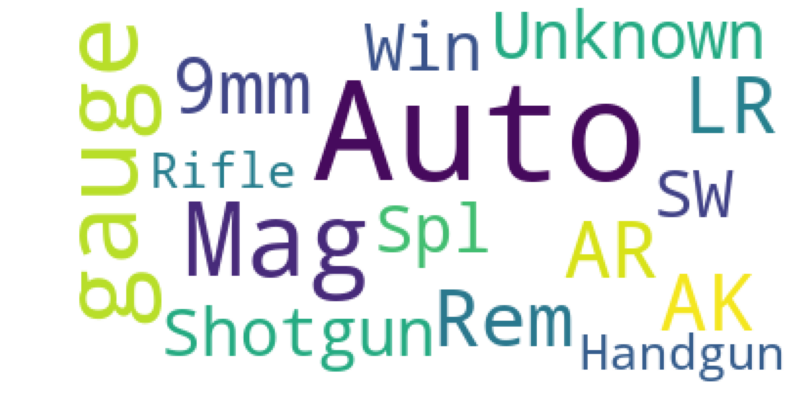

In [25]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                         ).generate(' '.join(str_set))
print(wordcloud)
fig = plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##  Areas of maximum Gun related incidences

Now we are going to plot the same graph of Gun usage incidence in different states but now our motive is to see weather geographical condition has to do anything with these incidences.

In [19]:
item=df['state'].value_counts().index.tolist()
item_size=df['state'].value_counts().values.tolist()

cities = []
scale = 250


for i in range(len(item)):
    lim = item[i]
    df_sub = df.loc[df['state']==lim][:1]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = item[i] + '<br>Gun abuse ' + str(item_size[i]),
        marker = dict(
            size = item_size[i]/scale,
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = lim )
    cities.append(city)

layout = dict(
        title = 'Gun abuse around USA state',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
#fig.show(renderer="colab")
py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )
plt.savefig('abc.png')

<Figure size 432x288 with 0 Axes>

It is so clear from the plot that the region on the EAST is having more incidences of gun usage than any other part.

In map we can point out ares where it is relatively very low(safe for living)

to be more sure about these facts we will see these distribution of gun use across USA in difference city or county.

In [28]:
item=df['city_or_county'].value_counts()[:1000].index.tolist()
item_size=df['city_or_county'].value_counts()[:5000].values.tolist()

cities = []



for i in range(len(item)):
    lim = item[i]
    df_sub = df.loc[df['city_or_county']==lim][:1]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['state'],
        marker = dict(
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = lim )
    cities.append(city)

layout = dict(
        title = 'Gun abbuse around USA',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
py.iplot( fig, validate=False, filename='d3-bubble-map-populations-b' )

We can clearly see the density of incidences in USA.

## Most Serious Gun Violence Incidents ¶

Lets locate the most serious gun violence incidents which occured in the recent past. Most serious incidents are defiend by the total number of killings and injured

In [83]:
df1 = df.sort_values(['loss'], ascending=[False])
df1[['date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured']].head(10)

,date,state,city_or_county,address,n_killed,n_injured
130448,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53
217151,2017-11-05,Texas,Sutherland Springs,216 4th St,27,20
101531,2015-12-02,California,San Bernardino,1365 South Waterman Avenue,16,19
232745,2018-02-14,Florida,Pompano Beach (Parkland),5901 Pine Island Rd,17,17
70511,2015-05-17,Texas,Waco,4671 S Jack Kultgen Fwy,9,18
195845,2017-07-01,Arkansas,Little Rock,220 W 6th St,0,25
137328,2016-07-25,Florida,Fort Myers,3580 Evans Ave,2,19
11566,2014-04-02,Texas,Fort Hood,Motor Pool Road and Tank Destroyer Boulevard,4,16
73,2013-05-12,Louisiana,New Orleans,Frenchmen Street,0,19
92624,2015-10-01,Oregon,Roseburg,1140 Umpqua College Rd,10,9


Lets plot the locations of these incidents on the map.

In [88]:
smalldf = df[df['n_killed'] >= 3][['latitude', 'longitude', 'loss', 'n_killed']].dropna()
map1 = folium.Map(location=[39.50, -98.35], tiles='CartoDB dark_matter', zoom_start=3.5)
map2 = folium.Map([39.50, -98.35], zoom_start=3.5, tiles='cartodbdark_matter')
markers = []
for i, row in smalldf.iterrows():
    loss = row['loss']
    if row['loss'] > 100:
        loss = row['loss']*0.1    
    folium.CircleMarker([float(row['latitude']), float(row['longitude'])], radius=float(loss), color='#ef4f61', fill=True).add_to(map1)
#     markers.append([float(row['latitude']), float(row['longitude']), row['n_killed']])
# map2.add_child(plugins.HeatMap(markers, radius=12))
map1

Lets plot only the top 10 incidents by the loss

In [90]:
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]


def returnsize(x):
    if x > 200:
        return 60
    elif x > 80:
        return 40
    elif x > 30:
        return 25
    elif x > 10:
        return 15
    elif x > 5: 
        return 10
    else:
        return 5

df1['size'] = df1['loss'].apply(lambda x: returnsize(x))
dfs = df1.head(50)

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = dfs['longitude'],
        lat = dfs['latitude'],
        text = dfs['city_or_county'],
        mode = 'markers',
        marker = dict(
            size = dfs['size'],
            opacity = 0.5,
            cmin = 0,
        ))]

layout = dict(
        title = 'Most Serious Gun Violence Incidents in US',
        colorbar = True,
        geo = dict(
            projection=dict( type='albers usa' ),
            subunitcolor = "rgb(221, 221, 221)",
            subunitwidth = 1.0
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False)

Las Vegas shootings were the most serious gun violence incident in which more than 600 people were harmed, including 60 killings. Orlando Shootings in 2016 when about 50 people were killed and other 50 injured is another important gun violence event past few years. Most recent texas shootings in November, 2017 was another serious incident when 25+ people were killed.

## Key characteristics of Gun Violence Incidents 

Lets understand what are the key characteristics of gun violence incidents

In [91]:
from collections import Counter
big_text = "||".join(df['incident_characteristics'].dropna()).split("||")
incidents = Counter(big_text).most_common(20)
xx = [x[0] for x in incidents]
yy = [x[1] for x in incidents]

trace1 = go.Bar(
    x=yy[::-1],
    y=xx[::-1],
    name='Incident Characterisitcs',
    marker=dict(color='purple'),
    opacity=0.3,
    orientation="h"
)
data = [trace1]
layout = go.Layout(
    barmode='group',
    margin=dict(l=350),
    width=800,
    height=600,
    legend=dict(dict(x=-.1, y=1.2)),
    title = 'Key Incident Characteristics',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

## Prominent Age of Gun Violence Suspects 
Lets find out from the data what are the main age-groups of the gun violence suspects. The data is not directly available, so I have written a code to get this information by combining multiple columns.

In [131]:
df['participant_type_map'].dtype

dtype('O')

In [142]:
def get_user_mapping(txt):
    if txt == "NA":
        return {}
    mapping = {}
    for d in txt.split("||"):
        try:
            key = d.split("::")[0]
            val = d.split("::")[1]
            if key not in mapping:
                mapping[key] = val
        except:
            pass
    return mapping

df['participant_type'] = df['participant_type'].fillna("NA")
df['participant_type_map'] = df['participant_type'].apply(lambda x : get_user_mapping(x))
df['participant_age'] = df['participant_age'].fillna("NA")
df['participant_age_map'] = df['participant_age'].apply(lambda x : get_user_mapping(x))
df['participant_gender'] = df['participant_gender'].fillna("NA")
df['participant_gender_map'] = df['participant_gender'].apply(lambda x : get_user_mapping(x))

## Finding the Suspect Age Groups
suspect_age_groups = {}
for i, row in df.iterrows():
    suspects = []
    for k,v in row['participant_type_map'].items():
        if "suspect" in v.lower():
            suspects.append(k)
    for suspect in suspects:
        if suspect in row['participant_age_map']:
            ag = row['participant_age_map'][suspect]
            if ag not in suspect_age_groups:
                suspect_age_groups[ag] = 0 
            else:
                suspect_age_groups[ag] += 1
#suspect_age_groups= dict(sorted(suspect_age_groups.items()))
suspect_age_groups = {int(key): value for key, value in suspect_age_groups.items()}
#xaxis={'categoryorder':'array', 'categoryarray':['d','a','c','b']}
trace1 = go.Bar(x=list(suspect_age_groups.keys()), y=list(suspect_age_groups.values()), opacity=0.75, name="month", marker=dict(color='brown'))
layout = dict(height=400, title='Suspects Age - Distribution', xaxis=dict(range=[0, 100]), legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
#fig.update_layout(xaxis={'categoryorder':'category ascending'})
py.iplot(fig)

So we can observe that teenagers : Age 18 - 19 are mostly involved with gun violence incidents which is quite a sad insight.

## Prominent Age of Gun Violence Victims 

Similarly lets plot what are the ages of people affected in the gun violence incidents.

In [148]:
victim_age_groups = {}
for i, row in df.iterrows():
    victims = []
    for k,v in row['participant_type_map'].items():
        if "victim" in v.lower():
            victims.append(k)
    for victim in victims:
        if victim in row['participant_age_map']:
            ag = row['participant_age_map'][victim]
            if ag not in victim_age_groups:
                victim_age_groups[ag] = 0 
            else:
                victim_age_groups[ag] += 1
victim_age_groups = {int(key): value for key, value in victim_age_groups.items()}               
trace1 = go.Bar(x=list(victim_age_groups.keys()), y=list(victim_age_groups.values()), opacity=0.75, name="month", marker=dict(color='#3A6A3A'))
layout = dict(height=400, title='Victims Age - Distribution', xaxis=dict(range=[0, 100]), legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig)

## Gender Groups - Victims and Suspects 
Lets see the distribution of geneder of people involved in the incidents - suspects and victims


In [149]:

## find gender groups 
suspect_age_groups = {}
victim_age_groups = {}
for i, row in df.iterrows():
    suspects = []
    for k,v in row['participant_type_map'].items():
        if "suspect" in v.lower():
            suspects.append(k)
    for suspect in suspects:
        if suspect in row['participant_gender_map']:
            ag = row['participant_gender_map'][suspect]
            if ag not in suspect_age_groups:
                suspect_age_groups[ag] = 0 
            else:
                suspect_age_groups[ag] += 1
                        
    victims = []
    for k,v in row['participant_type_map'].items():
        if "victim" in v.lower():
            victims.append(k)
    for victim in victims:
        if victim in row['participant_gender_map']:
            ag = row['participant_gender_map'][victim]
            if ag not in victim_age_groups:
                victim_age_groups[ag] = 0 
            else:
                victim_age_groups[ag] += 1
                
del victim_age_groups['Male, female']
fig = {
  "data": [
    {
      "values": list(suspect_age_groups.values()),
      "labels": list(suspect_age_groups.keys()),
      "marker" : dict(colors=['hotpink','cadetblue']),
      "name": "Suspects",
      "domain": {"x": [0, .48]},
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },
    {
      "values": list(victim_age_groups.values()),
      "labels": list(victim_age_groups.keys()),
      "text": ["Victims"],
      "marker" : dict(colors=['cadetblue','hotpink']),
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Victims",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    }],
  "layout": {
          "showlegend" : False,
        "title":"Genders of People Involved",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Suspects",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Victims",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

## People killed and injured over time

We are having a look at how many people are victims of these Gun violence over the course of time.

In [75]:
years_killed=df.groupby(df['year']).sum()
x=years_killed['n_killed'].index.tolist()
y=years_killed['n_killed'].values.tolist()
z=years_killed['n_injured'].values.tolist()

#create style trace
trace0=go.Scatter(
x = x,
y = y,
name='no. of people killed',
  line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,dash='dot')
)
trace1=go.Scatter(
x = x,
y = z,
name='no. of people injured',
  line = dict(
        color = ('rgb(10, 205, 26)'),
        width = 4,dash='dot')
)
trace2=go.Scatter(
x = x,
y = [y+z for y,z in zip(y,z)],
name='Total no. of people effected',
  line = dict(
        color = ('rgb(20, 20, 205)'),
        width = 4,dash='dot')
)


data=[trace0,trace1,trace2]

#edit layout

layout=dict(title='people killed or injured every year',
           xaxis=dict(title='Years'),
           yaxis=dict(title='NO. of people killed or injured'))

fig = dict(data=data, layout=layout)
#fig.show()
py.iplot(fig , filename='styled-line')
#configure_plotly_browser_state()

We can definately see a trend over there .

obviously more peoples are injured tha killed.


## Time series of incidences and effects

We are now looking into how many incidences recorded in duration of 2013-2018 and how they effected the people.

In [34]:
df['singles']=1

In [35]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')

In [36]:
time_s=df.groupby(['date']).sum()

In [37]:
trace1 = go.Scatter(
                x=time_s.index,
                y=time_s['n_killed'],
                name = "People killed",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace2 = go.Scatter(
                x=time_s.index,
                y=time_s['n_injured'],
                name = "Injured",
                line = dict(color = '#3F3B3C'),
                opacity = 0.8)
trace3 = go.Scatter(
                x=time_s.index,
                y=time_s['singles'],
                name = "Incidences",
                line = dict(color = '#3A6A3A'),
                opacity = 0.8)
data = [trace1,trace2,trace3]

layout = dict(
    title = "Over time stats",
    xaxis = dict(
        range = ['2013-01-01','2018-04-01'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Manually Set Range")
plt.savefig('xyz.png')  

<Figure size 432x288 with 0 Axes>

In [77]:
df_gropuped = df[["year","n_killed","n_injured"]].groupby(by="year",as_index=False).sum()
df_gropuped

,year,n_killed,n_injured
0,2013,317,979
1,2014,12557,23002
2,2015,13484,26967
3,2016,15066,30580
4,2017,15511,30703
5,2018,3533,6171


In [80]:
r = np.arange(len(df_gropuped["year"]))
width = 0.25
  
  
plt.bar(r, df_gropuped["n_killed"], color = 'b',
        width = width, edgecolor = 'black',
        label='number killed')
plt.bar(r + width, df_gropuped["n_injured"], color = 'g',
        width = width, edgecolor = 'black',
        label='number injured')
  
plt.xlabel("Year")

  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,list(df_gropuped["year"]))
plt.legend()
  
plt.show()

SyntaxError: invalid non-printable character U+00A0 (Temp/ipykernel_9816/1431503543.py, line 18)

We can see from the graph above that there are more gun violence events every year. Nearly 51 thousand incidences of gun violence were reported in 2014; this figure rose to 53 thousand the following year; nearly 58 thousand incidents were reported in 2016; and 61 thousand occurrences were reported in 2017. 10,000 more occurrences were reported between 2014 and 2017. Much though 2018 is only halfway over, this number is anticipated to rise even further.

In [71]:
# 2014 time series
temp = df[df['year'] == 2014].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = 'black'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = 'firebrick'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = 'blueviolet'))

data = [trace1, trace2, trace3]
layout = dict(height=350, title = 'Gun Violence Incidents - 2014', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
py.iplot(fig)



# 2015 time series
temp = df[df['year'] == 2015].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = 'black'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = 'firebrick'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = 'blueviolet'))

data = [trace1, trace2, trace3]
layout = dict(height=350, title = 'Gun Violence Incidents - 2015', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
py.iplot(fig)





# 2016 time series
temp = df[df['year'] == 2016].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = 'black'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = 'firebrick'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = 'blueviolet'))

data = [trace1, trace2, trace3]
layout = dict(height=350,title = 'Gun Violence Incidents - 2016', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
py.iplot(fig)


# 2017 time series
temp = df[df['year'] == 2017].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = 'black'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = 'firebrick'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = 'blueviolet'))

data = [trace1, trace2, trace3]
layout = dict(height=350,title = 'Gun Violence Incidents - 2017', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
py.iplot(fig)



In [73]:
# 2018 time series
temp = df[df['year'] == 2018].groupby('date').agg({'state' : 'count', 'n_killed' : 'sum', 'n_injured' : 'sum'}).reset_index().rename(columns={'state' : 'incidents'})


trace1 = go.Scatter(x = temp.date, y = temp.incidents, name='Total Incidents', mode = "lines", marker = dict(color = 'black'))
trace2 = go.Scatter(x = temp.date, y = temp.n_killed, name="Total Killed", mode = "lines", marker = dict(color = 'firebrick'))
trace3 = go.Scatter(x = temp.date, y = temp.n_injured, name="Total Injured", mode = "lines", marker = dict(color = 'blueviolet'))

data = [trace1, trace2, trace3]
layout = dict(height=350,title = 'Gun Violence Incidents - 2018', legend=dict(orientation="h", x=-.01, y=1), xaxis= dict(title='Date Time', ticklen= 1))
fig = dict(data = data, layout = layout)
py.iplot(fig)

## 4th July - Most Dangerous Date 

From the above graphs, we can observe the highest peaks around July 4th and July 5th every year from 2014 to 2017. This is very interesting as July 4th is celebrated as the Independence Day in United States of America. From this data, it seems that 4th july - 5th july are the dates related with very large number of gun violence incidents, hence are the most dangerous dates. The holiday can also contributes to the fact that large number of gun violence incidents are reported.

July 4th, 2014 : Total Incidents : 192, Total Injuries : 92, Total Killed : 48

July 4th, 2015 : Total Incidents : 211, Total Injuries : 142, Total Killed : 60

July 4th, 2016 : Total Incidents : 224, Total Injuries : 163, Total Killed : 52

July 4th, 2017 : Total Incidents : 248, Total Injuries : 146, Total Killed : 62

References:

https://www.theguardian.com/world/2014/jul/07/gun-violence-fourth-of-july-weekend
https://www.cbsnews.com/news/chicago-violence-fourth-of-july-weekend-shootings/


A similar trend is observed for July 5th, which is the next day of Independence Day.

5th July, 2014 - 212 Incidents

5th July, 2015 - 211 Incidents

5th July, 2016 - 224 Incidents

5th July, 2017 - 248 Incidents


After observing this trend on one of the important holiday of US, Our team was curious to obtain these numbers on other holidays. After investigating the important holidays of US ie. Christmas, Thanksgiving, Labor Day, Memorial Day, one can see that number of gun violence incients are also significantly higher.